#  **TABLE OF CONTENTS**

---

## **1. Introduction**

## **2. Preparing and exploring the data**

> ###  2.1 Import librabries and handle missing value
> > #### 2.1.1 Check out some basic information of data
> > #### 2.1.2 Check missing value
> ###  2.2 Data analyzing and feature selection
> > #### 2.2.1 Handle high correlated features
> > #### 2.2.2 Handle outlier and visualize correlation of categorical features

## **3. Hypothesis testing**
> ### 3.1 Anova test for Origin feature
> ### 3.2 Anova test for UniqueCarrier feature
> ### 3.3 Anova test for Dest feature




## **1. Introduction**



## **2. Preparing and exploring the data**



### 2.1 Import librabries and handle missing value

> Connect Google Drive to Google Colab and import necessary librabries

> Load the data in file csv from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # Librabry for table data
import numpy as np # Librabry for algebra
from scipy import stats # Library for statistic
# Library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/2007.csv') # Load data from Google Drive
df.head() # See some information at the top of dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,NaN,0,0,0,0,0,0


#### 2.1.1 Check out some basic information of data

In [ ]:
df.shape # Size of data 

(7453215, 29)

> We will remove unnecessary data: 
> > - Year: because all data points are in 2007 

> > - Cancelled, Diverted, CancellationCode: three features is unrealted to the model

> We see that:
> > 1. DepDelay = DepTime - CRSDepTime

> > 2. ArrDelay = ArrTime - CRSArrTime=CarrierDelay + WeatherDelay+ NASDelay + SecurityDelay + LateAircraftDelay

> > 3. ArrDelay = DepDelay + (ActualElapsedTime - CRSElapsedTime CRSElapsedTime 

> Therefore, we remove actual data:
> > ArrTime, CRSArrTime, CarriesDelay,WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, ArrDelay.




In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Year', 'Cancelled','CancellationCode','ArrTime','CRSArrTime','CarrierDelay',\
                      'WeatherDelay','NASDelay', 'SecurityDelay', 'LateAircraftDelay','ActualElapsedTime'])
df.drop_duplicates() # Drop dulicated data

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted
0,1,1,1,1232.0,1225,WN,2891,N351,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0
1,1,1,1,1918.0,1905,WN,462,N370,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0
2,1,1,1,2206.0,2130,WN,1229,N685,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0
3,1,1,1,1230.0,1200,WN,1355,N364,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0
4,1,1,1,831.0,830,WN,2278,N480,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,12,15,6,1558.0,1605,DL,58,N670DN,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0
7453211,12,15,6,1902.0,1851,DL,59,N829MH,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0
7453212,12,15,6,1024.0,1025,DL,61,N623DL,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0
7453213,12,15,6,1353.0,1315,DL,62,N970DL,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0



#### 2.1.2 Check missing value

In [ ]:
df.isnull().sum() # Sum of missing values

Month                  0
DayofMonth             0
DayOfWeek              0
DepTime           160748
CRSDepTime             0
UniqueCarrier          0
FlightNum              0
TailNum               22
CRSElapsedTime       994
AirTime           177927
ArrDelay          177927
DepDelay          160748
Origin                 0
Dest                   0
Distance               0
TaxiIn                 0
TaxiOut                0
Diverted               0
dtype: int64

> We can see that the data with missing values are: DepTime, TailNum, CRSElapsedTime, AirTime, ArrDelay, DepDelay. We need to handle these missing values in the most reasonable way. 



In [ ]:
df.describe().T # Descriptive statistic of numeric dataset

,count,mean,std,min,25%,50%,75%,max
Month,7453215.0,6.514876,3.425117,1.0,4.0,7.0,9.0,12.0
DayofMonth,7453215.0,15.725889,8.781154,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7453215.0,3.933804,1.992267,1.0,2.0,4.0,6.0,7.0
DepTime,7292467.0,1339.221099,479.852777,1.0,930.0,1329.0,1733.0,2400.0
CRSDepTime,7453215.0,1330.596349,464.707954,0.0,930.0,1322.0,1720.0,2359.0
FlightNum,7453215.0,2188.099289,1971.957664,1.0,590.0,1509.0,3553.0,9602.0
CRSElapsedTime,7452221.0,127.250240,70.357498,-1240.0,77.0,110.0,156.0,1430.0
AirTime,7275288.0,102.815936,68.245767,0.0,55.0,84.0,131.0,1257.0
ArrDelay,7275288.0,10.192181,39.307739,-312.0,-9.0,0.0,14.0,2598.0
DepDelay,7292467.0,11.399142,36.141889,-305.0,-4.0,0.0,11.0,2601.0


In [ ]:
df.describe(include=[object])  # Descriptive statistic of object dataset

,UniqueCarrier,TailNum,Origin,Dest
count,7453215,7453193,7453215,7453215
unique,20,5505,304,310
top,WN,0,ATL,ATL
freq,1168871,105239,413851,413805



> Evaluate each data and how to process each feature base on above tables

> 1. DepTime:

> > - Missing values: 160748/7453215 (2.16%).

> > - Solution: Because the departure time depends on the flight and destination, we cannot use alternative statistical methods, so we decided to **remove these rows** due to the low percentage of our data.

> 2. TailNum:

> > - Missing values: 22/7453215 (0.0003%)

> > - Solution: This is categorical data, we cannot use alternative statistical methods because it may not exist, so we will **remove these rows** because it makes up an extremely low percentage of our data. 

> 3. CRSElapsedTime:

> > - Missing values: 994/7453215 (0.01%).

> > - Basic statistics index: Mean 127.250240, Std 70.357498, Median 156, Min = -1240.0, Max = 1430.

> > - Solution: Because the missing data is not much and std is very large, the method with little effect on the model is probably taking the mean, so we **replace NaN with the Mean value**.

> 4. AirTime:

> > - Missing values: 177927/7453215 (2.39%).

> > - Basic statistics index: Mean 102.815936, Std 68.245767, Median 0, Min = -312.0, Max = 2598257.

> > - Solution: Because the missing data is not much and std is very large, the method with little effect on the model is probably taking the mean, so we **replace NaN with the Mean value**.

> 5. ArrDelay:

> > - Missing values: 177927/7453215 (2.39%).

> > - Basic statistics index: Mean 10.192181, Std 39.307739, Median -305.0, Min = 0, Max = 2601.0.

> > - Solution: Because the missing value is quiet largeBecause the missing data is not much and std is very large, the method with little effect on the model is probably taking the mean, so we **replace NaN with the Mean value**.


> 6. DepDelay:

> > - Missing values: 160748/7453215 (2.16%).

> > - Basic statistics index: Mean 11.399142, Std 36.141889, Median -305.0, Min = 0, Max = 2601.0.

> > - Solution: Because the missing value is quiet largeBecause the missing data is not much and std is very large, the method with little effect on the model is probably taking the mean, so we **replace NaN with the Mean value**.




In [ ]:
# Delete all NaN rows of DepTime and TailNum
df = df.dropna(subset=['DepTime', 'TailNum'])
# Replace NaN with the Mean value 
df.DepDelay.fillna(df.DepDelay.mean(), inplace=True)
df.CRSElapsedTime.fillna(df.CRSElapsedTime.mean(), inplace=True)
df.AirTime.fillna(df.AirTime.mean(), inplace=True)
df.ArrDelay.fillna(df.AirTime.mean(), inplace=True)

In [ ]:
df.head(4) # Check ArrDelay again

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted
0,1,1,1,1232.0,1225,WN,2891,N351,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0
1,1,1,1,1918.0,1905,WN,462,N370,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0
2,1,1,1,2206.0,2130,WN,1229,N685,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0
3,1,1,1,1230.0,1200,WN,1355,N364,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0


In [ ]:
df.isnull().sum()  # Check missing value again

Month             0
DayofMonth        0
DayOfWeek         0
DepTime           0
CRSDepTime        0
UniqueCarrier     0
FlightNum         0
TailNum           0
CRSElapsedTime    0
AirTime           0
ArrDelay          0
DepDelay          0
Origin            0
Dest              0
Distance          0
TaxiIn            0
TaxiOut           0
Diverted          0
dtype: int64


### 2.2 Data analyzing and feature selection



#### 2.2.1 Handle high correlated features

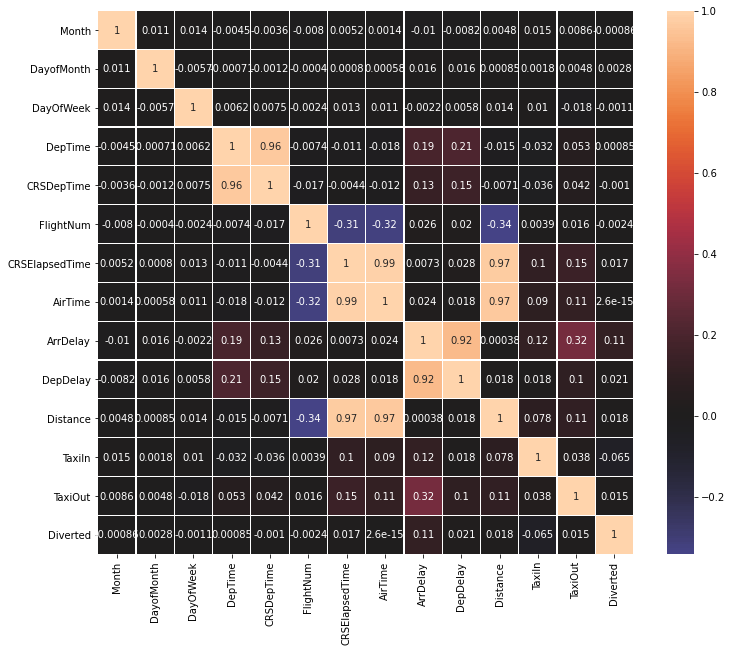

In [ ]:
plt.figure(figsize=(12,10)) # Create new figure   
corr = df.corr() # Calculate correlation of features and plot diagram using seaborn librabry
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, center=0,  annot= True, linewidths=0.2)

> Because DepTime and CRSDepTime, AirTime and CRSElapsedTime, Distance and AirTime, Distance and CRSElapsedTime have high correlation, we **remove 3 features AirTime, CRSElapsedTime, CRSDepTime** to make the model more realistic.




In [ ]:
# Delete 3 features high correlation 
del df['AirTime']
del df['CRSElapsedTime']
del df['CRSDepTime']

> **Categorical data**: Month, DayofMonth, DayOfWeek, UniqueCarrier, Origin, Dest, TailNum, Diverted.

> **Numerical data**: DepTime, FlightNum, ArrDelay, DepDelay, Distance, TaxiIn, TaxiOut.

In [ ]:
# List numerical feature
# This is scheduled data
list_numerical_features = ['DepTime','FlightNum','Distance','TaxiIn','TaxiOut','DepDelay'] 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

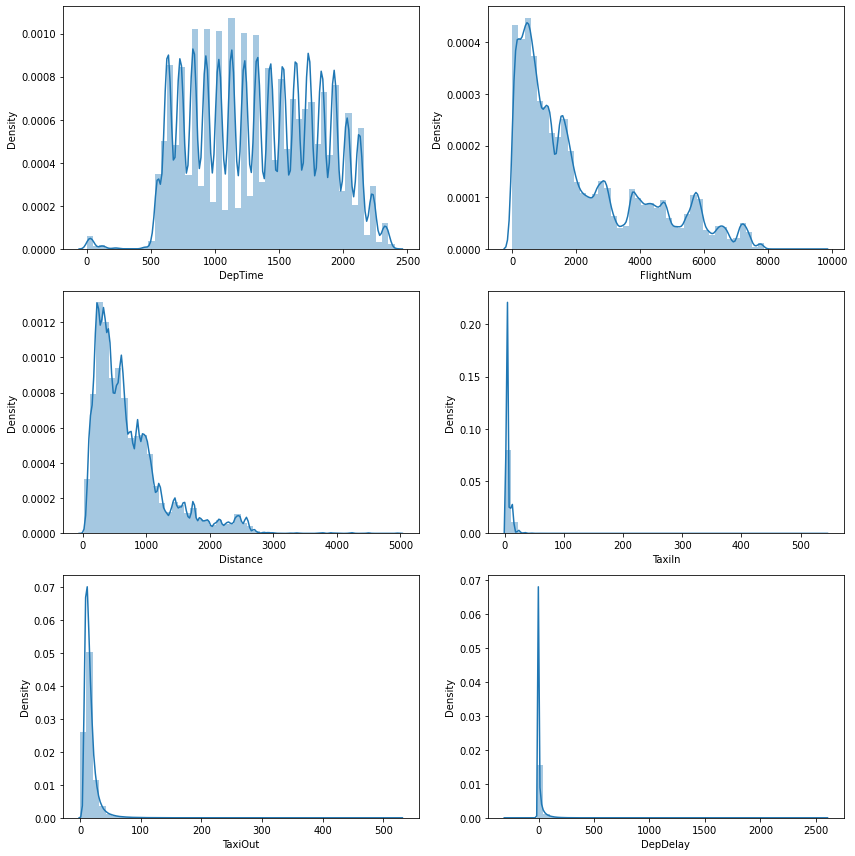

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(12,12)) # Create new figure with 3 rows and 2 columns
i=0 
for x in range(3):
    for y in range(2):
        sns.distplot(df[list_numerical_features[i]], ax = ax[x,y]) # Plot distribution diagram
        i += 1 
plt.tight_layout() # Adjust subplots fit figure area
plt.show() # Show all subplots

> **Conclusion:** All are not normally distribution, so we need to standardize the data to increase accuracy for data analysis.

#### 2.2.2 Handle outlier and visualize correlation of categorical features

In [ ]:
# Function to remove outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) # Q1
    q3 = df_in[col_name].quantile(0.75) # Q3
    iqr = q3-q1 # Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
# Remove outlier all feature columns of data
for column in list_numerical_features:
  df = remove_outlier(df,column)

> Check the correlation of ArrDelay and categorical feature such as: UniqueCarrier, Month, DayOfMonth, DayOfWeek. 

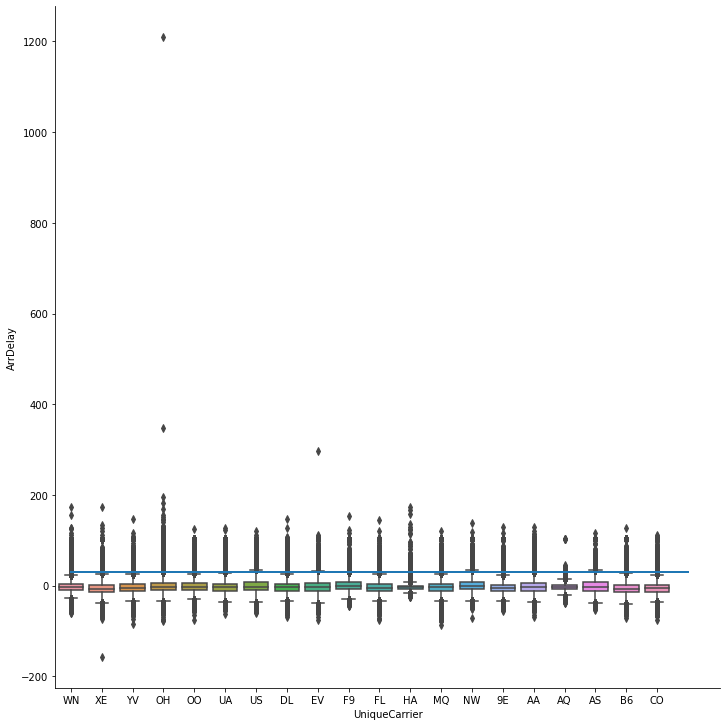

In [ ]:
sns.catplot(x='UniqueCarrier', y='ArrDelay', data=df, height=10, kind='box') # Box plot 
plt.plot([0, 20], [30, 30], linewidth=2) # Mean line

> **Conlusion:** Mean of all is less than 30 minutes, so there are no late flights 

> Define target column (ArrDelay) and encode ArrDelay to categorical data

In [ ]:
# Encode ArrDelay feature to 1 if the plane is more than 30 minutes late and to 0 if less
# ArrDelay_categorical will store categorical data of ArrDelay column
df['ArrDelay_categorical'] = np.where(df['ArrDelay'] >= 30, 1, 0)

In [ ]:
df['ArrDelay_categorical'].value_counts() # Check the number of 2 classes 1 and 0 after regulation

0    5204547
1     102016
Name: ArrDelay_categorical, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'Upper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


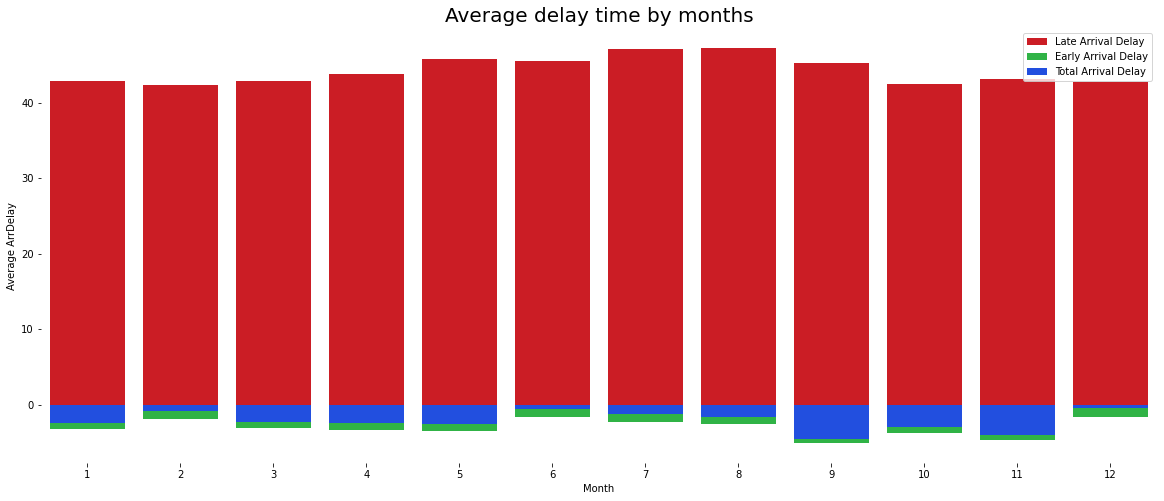

In [ ]:
early_month = df[df['ArrDelay_categorical'] == 0].groupby('Month').ArrDelay.mean() # Group the same values by the mean of ArrDelay
early_month = pd.DataFrame({'Month':range(1,13),'ArrDelay':early_month.values}) 
late_month = df[df['ArrDelay_categorical'] == 1].groupby('Month').ArrDelay.mean()
late_month = pd.DataFrame({'Month':range(1,13),'ArrDelay':late_month.values})
total_month = df.groupby('Month').ArrDelay.mean()
total_month = pd.DataFrame({'Month':range(1,13),'ArrDelay':total_month.values})
# Create new figure for subplots
f, ax = plt.subplots(ncols=1,figsize=(20,8))
# Plot diagram
sns.set_color_codes("bright")
sns.barplot(y="ArrDelay", x="Month", data=late_month, label='Late Arrival Delay', color='r', orient='v', ax=ax)
sns.set_color_codes("bright")
sns.barplot(y='ArrDelay', x='Month',data=early_month,label='Early Arrival Delay',color='g', orient='v',ax=ax)
sns.set_color_codes("bright")
sns.barplot(y='ArrDelay', x='Month',data=total_month,label='Total Arrival Delay',color='b', orient='v',ax=ax)
# Finalize
ax.legend(ncol=1, loc="Upper right", frameon=True)
ax.set(ylabel='Average ArrDelay')
ax.set_title('Average delay time by months', fontdict={'fontsize': 20})
ax.grid(False)
ax._frameon = False
del early_month
del late_month
del total_month


> **Conclusion:** Based on the graph

> 1.   Late flights are the largest proportion.
> 2.   The mean of delay time is 40 minutes or more.
> 3.   The delay time is highest in July, August, September. 



In [ ]:
# Convert DayOfMonth to categorical feature
df["Week"]=df["DayofMonth"]
# Week1
for i in range(1,8):
  df['Week'] = df['Week'].replace(i,'Week_1')
# Week2
for i in range(8,15):
  df['Week'] = df['Week'].replace(i,'Week_2')
# Week3
for i in range(15,22):
  df['Week'] = df['Week'].replace(i,'Week_3')
# Week4
for i in range(22,31):
  df['Week'] = df['Week'].replace(i,'Week_4')

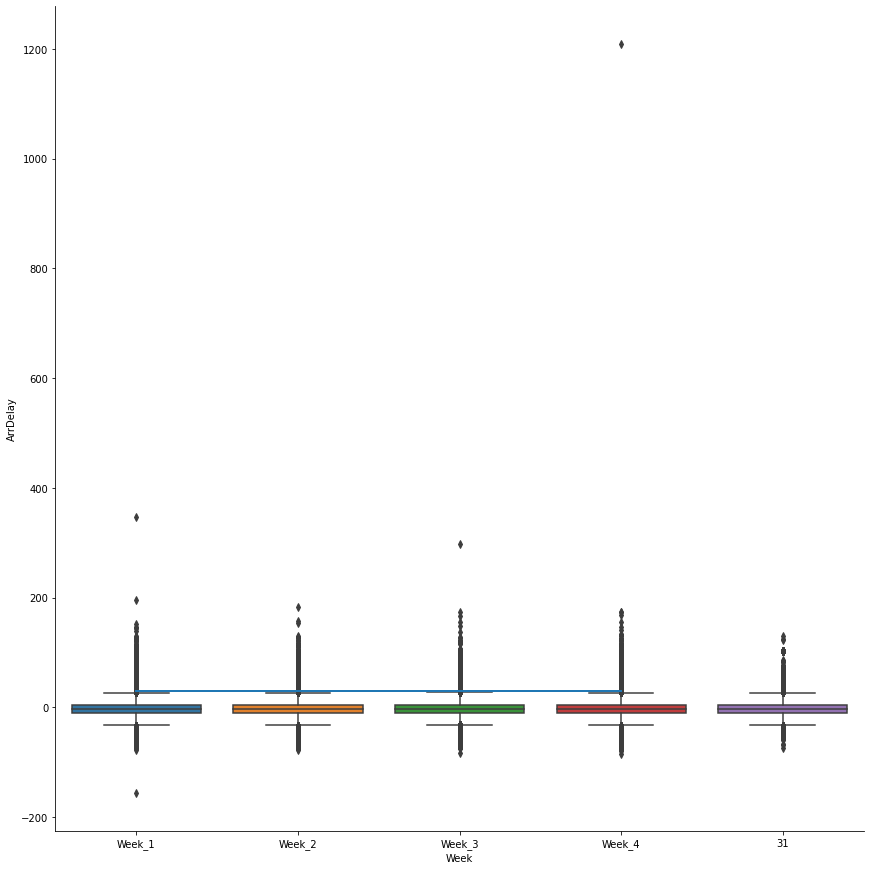

In [ ]:
sns.catplot(x='Week', y='ArrDelay', data=df,height=12,kind='box') # Box plot
plt.plot([0, 3], [30,30], linewidth=2) # Mean line

> **Conclusion:** Based on the graph

> 1.   The mean of delay time is less than 30 minutes.
> 2.   The delay time is almost the same at 4 Weeks.



In [ ]:
df['Day']=df['DayOfWeek']
Day_Of_Week = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# Covert the numerical to day of week
for i in range(1,8):
  df['Day'] = df['Day'].replace(i,Day_Of_Week[i-1])


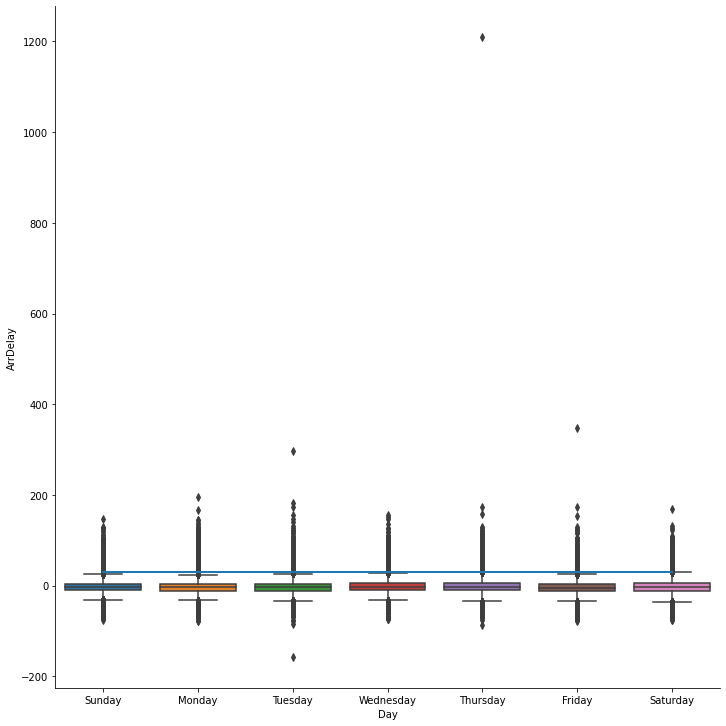

In [ ]:
sns.catplot(x='Day', y='ArrDelay', data=df,height=10,kind='box') # Box plot
plt.plot([0, 6], [30,30], linewidth=2) # Mean line

> **Conclusion:** Based on the graph

> 1.   The mean of delay time is less than 30 minutes.
> 2.   The delay time is almost the same at 7 days.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'Upper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


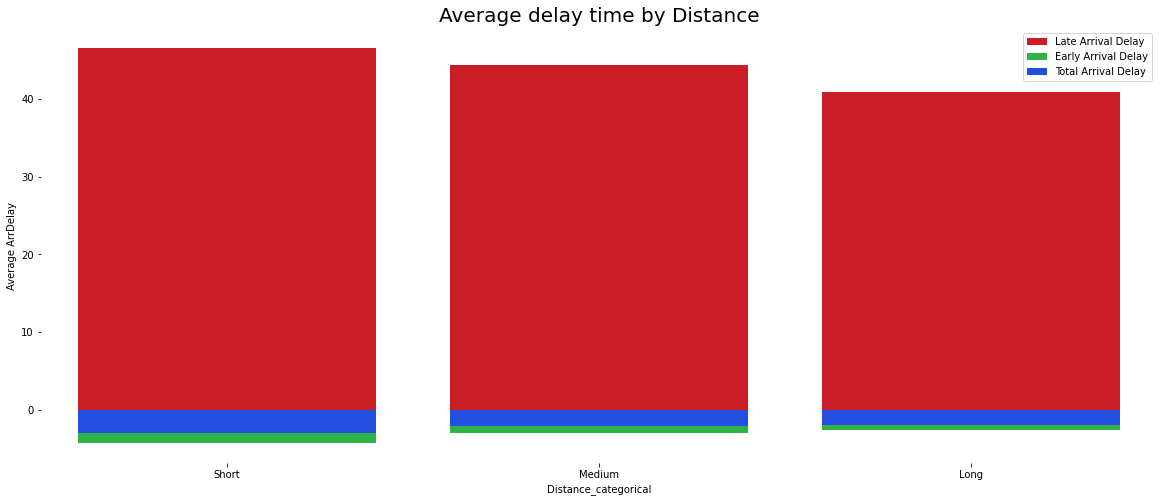

In [ ]:
df['Distance_categorical'] = df['Distance'].apply(lambda x: 'Short' if x<=326 else('Medium' if 326<x<954 else 'Long'))
early_DoW = df[df['ArrDelay_categorical'] == 0].groupby('Distance_categorical').ArrDelay.mean()
early_DoW = pd.DataFrame({'Distance_categorical': ['Short', 'Medium', 'Long'], 'ArrDelay':early_DoW.values})
late_DoW = df[df['ArrDelay_categorical'] == 1].groupby('Distance_categorical').ArrDelay.mean()
late_DoW = pd.DataFrame({'Distance_categorical': ['Short', 'Medium', 'Long'], 'ArrDelay':late_DoW.values})
total_DoW = df.groupby('Distance_categorical').ArrDelay.mean()
total_DoW = pd.DataFrame({'Distance_categorical':['Short', 'Medium', 'Long'],'ArrDelay':total_DoW.values})

# Create new figure for subplots
f, ax = plt.subplots(ncols=1,figsize=(20,8)) 
sns.set_color_codes('bright')
sns.barplot(y='ArrDelay', x='Distance_categorical', data=late_DoW, label='Late Arrival Delay', color='r', orient='v', ax=ax)
sns.set_color_codes('bright')
sns.barplot(y='ArrDelay', x='Distance_categorical',data=early_DoW,label='Early Arrival Delay',color='g', orient='v',ax=ax)
sns.set_color_codes('bright')
sns.barplot(y='ArrDelay', x='Distance_categorical', data=total_DoW, label='Total Arrival Delay', color='b', orient='v', ax=ax )
# Finalize
ax.legend(ncol=1, loc="Upper right", frameon=True)
ax.set(ylabel='Average ArrDelay')
ax.set_title('Average delay time by Distance', fontdict={'fontsize': 20})
ax.grid(False)
ax._frameon = False
del early_DoW
del late_DoW
del total_DoW 


> **Conclusion:**

> > The delay time in short, medium and high lines is near to each other

> > Regarding the number of flights delayed by distance, the short distance had the most late arrivals and the medium route had the most late arrivals. 

> > If we fly through the interquence of the middle, then the possibility of flight delay (Arrival Delay) is the lowest.



---


## **3. Hypothesis Testing**

### 3.1 Assumption:

1.   The samples are independent. (Currently independent)
2.   Each sample is from a normally distributed population. (Not standardized)
3.   The population standard deviations of the groups are all equal. 









### 3.1 Anova test for Origin feature
> H0: All values in Origin have the same mean

> H1: Not the same

In [ ]:
Origin_unique = pd.unique(df['Origin']) # Get unique value of Origin column
Decision = 'Reject' # State variable of H0 
Origin_sample = [] # List ArrDelay contain of the unique Origin

for unique_value in Origin_unique:
    Origin_list_unique = list(df["ArrDelay"][df[df["Origin"]==unique_value].index]) # Value of ArrDelay contain of the unique Origin
    Origin_sample.append(Origin_list_unique) # Add to list Origin_sample

for i in range(len(Origin_sample)-1):
    F, p = stats.f_oneway(Origin_sample[i],Origin_sample[i+1]) # Use Anova for each pair in Origin_sample 
    if p < 0.05: 
        Decision = 'Accept'
        break
print(Decision + " H0")

Accept H0


### 3.2 Anova test for UniqueCarrier feature
> H0: All values in UniqueCarrier have the same mean

> H1: Not the same

In [ ]:
UniqueCarrier_unique = pd.unique(df['UniqueCarrier']) # Get unique value of UniqueCarrier column
Decision = 'Reject' # State variable of H0 
UniqueCarrier_sample = [] # List ArrDelay contain of the unique UniqueCarrier

for unique_value in UniqueCarrier_unique:
    UniqueCarrier_list_unique = list(df["ArrDelay"][df[df["UniqueCarrier"]==unique_value].index]) # Value of ArrDelay contain of the unique UniqueCarrier
    UniqueCarrier_sample.append(UniqueCarrier_list_unique) # Add to list UniqueCarrier_sample

for i in range(len(UniqueCarrier_sample)-1):
    F, p = stats.f_oneway(UniqueCarrier_sample[i],UniqueCarrier_sample[i+1]) # Use Anova for each pair in UniqueCarrier_sample 
    if p < 0.05: 
        Decision = 'Accept'
        break
print(Decision + " H0")

Accept H0


### 3.3 Anova test for Dest feature
> H0: All values in Dest have the same mean.

> H1: Not the same

In [ ]:
Dest_unique = pd.unique(df['Dest']) # Get unique value of Dest column
Decision = 'Reject' # State variable of H0 
Dest_sample = [] # List ArrDelay contain of the unique Dest

for unique_value in UniqueCarrier_unique:
    Dest_list_unique = list(df["ArrDelay"][df[df["Dest"]==unique_value].index]) # Value of ArrDelay contain of the unique Dest
    Dest_sample.append(Dest_list_unique) # Add to list Dest_sample

for i in range(len(Dest_sample)-1):
    F, p = stats.f_oneway(Dest_sample[i],Dest_sample[i+1]) # Use Anova for each pair in Dest_sample 
    if p < 0.05: 
        Decision = 'Accept'
        break
print(Decision + " H0")

Accept H0


In [ ]:
df.to_csv('/content/drive/MyDrive/Data/new_2007.csv')



---

## **4. Conclusion**



1.   Data is imbalance when the number of late flights is almost 50 times more than the number of flights without delay
2.   The average value of the delay time of the days of the week or the months of the year is approximately equal and is proved by the hypothesis testing.
3. The data distribution of the features is not normally distributed

